In [2]:
import numpy as np
import random
import math
from math import pow
import time
import matplotlib.pyplot as plt

num_simulations = 10000

# <b>CÂU 1</b>
### Thiết kế thuật toán sinh số ngẫu nhiên 𝑋 ∈ {1, 2, 3} (tức là 𝑃(𝑋 = 1) = 𝑃(𝑋 = 2) = 𝑃(𝑋 = 3) = 1/3) chỉ được dùng một đồng xu đồng chất (xác suất ra ngửa là 50%).
Đây là một cách để thiết kế thuật toán tạo số ngẫu nhiên 𝑋 ∈ {1, 2, 3} bằng đồng xu hợp lý:

Tung đồng xu hai lần.
- Nếu kết quả là sấp-sấp    (SS), gán 𝑋 = 1.
- Nếu kết quả là sấp-ngửa   (SN), gán 𝑋 = 2.
- Nếu kết quả là ngửa-sấp   (NS), gán 𝑋 = 3.
- Nếu kết quả là ngửa-ngửa  (NN), lặp lại bước 1.

- Thuật toán này đảm bảo rằng mỗi kết quả có xác suất bằng nhau là 1/3 vì NN, NS và SN là những kết quả có khả năng xảy ra như nhau khi tung đồng xu công bằng hai lần.

In [446]:
def generate_random_number():
    while True:
        # Tung đồng xu
        coin_flip = random.randint(0, 1)
        
        # Nếu kết quả là mặt sấp
        if coin_flip == 0:
            # Tung đồng xu lần thứ hai
            coin_flip_2 = random.randint(0, 1)
            # Nếu kết quả là mặt sấp, gán X=1
            if coin_flip_2 == 0:
                return 1
            # Nếu kết quả là mặt ngửa, gán X=2
            else:
                return 2
        # Nếu kết quả là mặt ngửa
        else:
            # Tung đồng xu lần thứ hai
            coin_flip_2 = random.randint(0, 1)
            # Nếu kết quả là mặt sấp, gán X=3
            if coin_flip_2 == 0:
                return 3
            # Nếu kết quả là mặt ngửa, tiếp tục vòng lặp
            else:
                continue
            
total = [0,0,0]
for i in range(num_simulations):
    total[generate_random_number()-1] += 1
print(total[0]/num_simulations)
print(total[1]/num_simulations)
print(total[2]/num_simulations)

0.3397
0.3337
0.3266


# <b>CÂU 2</b>
### Cho 𝑆 là tập gồm 𝑛 đối tượng.
### a) Thiết kế thuật toán sinh ngẫu nhiên các tập con kích thước 𝑘 (0 ≤ 𝑘 ≤ 𝑛) của 𝑆 (tức là các tập con kích thước 𝑘 đều có cùng xác suất được sinh ra).

In [447]:
def generate_random_subset(S, k):
    n = len(S)
    subset = []
    indices = np.random.rand(n).argsort()[:k]
    for i in indices:
        subset.append(S[i])
    return subset
generate_random_subset([0, 1, 2, 3, 4], 2)

[1, 2]

### b) Dùng thuật toán trên để ước lượng xác suất của biến cố “bốc ngẫu nhiên 13 lá bài từ bộ bài Tây, bốc được tứ quý heo”.
- Số trường hợp có tứ quý heo =
$$
C_{48}^9
$$
- Tổng số trường hợp =
$$
C_{52}^{13}
$$
- Xác suất được tứ quý heo =
$$
\frac{C_{48}^9}{C_{52}^{13}}
$$

In [448]:
deck = [i for i in range(52)]
k = 13
n = len(deck)

num_simulations = 100000
count = 0
for i in range(num_simulations):
    hand = generate_random_subset(deck, k)
    if hand.count(0) == 1 and hand.count(1) == 1 and hand.count(2) == 1 and hand.count(3) == 1:
        count += 1

probability_estimate = count / num_simulations
probability_estimate

0.00248

### c) Thiết kế thuật toán sinh ngẫu nhiên các tập con của 𝑆 (tức là các tập con đều có cùng xác suất được sinh ra).

In [449]:
def generate_random_subset(S):
    n = len(S)
    subset = []
    r = int(np.random.rand() * (2**n-1))
    b = bin(r)[2:].zfill(n)
    for i in range(n):
        if b[i] == '1':
            subset.append(S[i])
    return subset


S = [0, 1, 2, 3, 4]
n = len(S)

subsets = []
for i in range(10000):
    subset = generate_random_subset(S)
    subsets.append(subset)
subsets

[[2, 3],
 [0, 1, 4],
 [0, 4],
 [1, 2, 3, 4],
 [0, 1, 4],
 [0, 1, 3],
 [0, 1, 4],
 [0, 3, 4],
 [3],
 [0, 1],
 [0],
 [0, 1, 2, 3],
 [1, 2, 4],
 [2, 3, 4],
 [0, 1],
 [1, 2, 4],
 [2, 3, 4],
 [1, 2],
 [0, 2, 3, 4],
 [2, 3, 4],
 [1, 2, 4],
 [0, 1, 2],
 [0, 1, 4],
 [0, 3],
 [1, 2],
 [2],
 [0, 4],
 [4],
 [3],
 [1, 3],
 [0],
 [1, 2, 4],
 [0, 2, 3, 4],
 [0],
 [2],
 [0, 1],
 [3],
 [2, 3, 4],
 [],
 [0, 2, 3],
 [1, 4],
 [0, 4],
 [0, 1, 2],
 [1, 2, 3, 4],
 [0, 1, 3, 4],
 [0, 2, 4],
 [2, 3, 4],
 [0, 1, 2, 3],
 [0, 1, 2, 3],
 [1, 2, 3, 4],
 [],
 [3],
 [0, 2, 3],
 [0, 2, 3, 4],
 [3, 4],
 [1, 2],
 [1, 2],
 [1, 2, 4],
 [3],
 [4],
 [1, 2, 3, 4],
 [2, 4],
 [0, 1, 4],
 [1, 3, 4],
 [1, 2, 4],
 [0, 1, 2, 3],
 [1, 4],
 [1, 3, 4],
 [0, 1, 3, 4],
 [1],
 [3],
 [1, 2, 4],
 [1, 2, 3, 4],
 [0, 1, 3],
 [0, 1, 2],
 [1, 2],
 [0, 1],
 [2, 3, 4],
 [2, 3],
 [0],
 [1, 3],
 [1, 2, 4],
 [0],
 [3, 4],
 [1, 2, 3],
 [0, 1, 4],
 [1],
 [1, 2, 3],
 [1],
 [1, 2, 4],
 [0, 1, 3],
 [0, 1, 2],
 [0, 1, 3, 4],
 [0, 1, 3, 4],
 [3],
 [1, 2

# <b>CÂU 3</b>
### Thực hiện các yêu cầu sau cho biến ngẫu nhiên 𝑋 có phân phối nhị thức với tham số 𝑛, 𝑝 cho trước.


In [450]:
n = 10
p = 0.5

### a) Thiết kế thuật toán sinh 𝑋 được phép dùng nhiều số ngẫu nhiên 𝒰(0, 1).

In [451]:
def generate_binomial_1(n, p):
    X = 0
    for i in range(n):
        U = random.uniform(0, 1)
        if U <= p:
            X += 1
    return X
generate_binomial_1(n, p)

3

### b) Thiết kế thuật toán sinh 𝑋 chỉ được dùng một số ngẫu nhiên 𝒰(0, 1).

In [452]:
def generate_binomial_2(n, p):
    U = random.uniform(0, 1)
    X = 0
    cdf = pow((1 - p), n)
    while U >= cdf:
        X += 1
        cdf += (p / (1 - p)) * (n - X + 1) / X * pow((1 - p), n)
    return X

### c) So sánh thời gian chạy của 2 thuật toán với các trường hợp: 𝑛 = 10, 𝑝 = 0.5 và 𝑛 = 1000, 𝑝 = 0.005.

In [453]:
def compare_algorithms(n, p, f):
    total_time = 0

    for i in range(num_simulations):
        start_time = time.time()
        f(n, p)
        total_time += time.time() - start_time
    print(f"{generate_binomial_1.__name__}(n={n},p={p}): {total_time/num_simulations:.6f} seconds")
compare_algorithms(n, p, generate_binomial_1)
# compare_algorithms(n, p, generate_binomial_2)
n = 1000
p = 0.005
compare_algorithms(n, p, generate_binomial_1)
# compare_algorithms(n, p, generate_binomial_2)

generate_binomial_1(n=10,p=0.5): 0.000002 seconds
generate_binomial_1(n=1000,p=0.005): 0.000212 seconds


# <b>CÂU 4</b>
### Cho 𝑋 là biến ngẫu nhiên có hàm mật độ xác suất

$$
f(x) = 
    \begin{cases}
        𝑒^x/(𝑒 − 1) & \text{nếu } 0 \le x \le 1, \\
        
        0 & \text{khác}.
    \end{cases}
$$

### a) Thiết kế 2 thuật toán khác nhau sinh X.

In [548]:
def generate_sample_mc4():
    U = np.random.uniform(0, 1)
    X = np.log(U*(np.e - 1))
    return X
generate_sample_mc4()

0.15112224105065736

In [546]:
def generate_sample_idf4(u):
    X = np.log(u*(np.e - 1) + 1)
    return X
generate_sample_idf4(np.random.uniform(0, 1))

0.04465537043558262

### b) So sánh 2 thuật toán.

In [550]:
# Test the algorithms by generating num_simulations samples and comparing their means
mc_samples = [generate_sample_mc4() for _ in range(num_simulations)]
idf_samples = [generate_sample_idf4(np.random.uniform(0, 1)) for _ in range(num_simulations)]

mc_mean = np.mean(mc_samples)
idf_mean = np.mean(idf_samples)

print("Monte Carlo method mean: ", mc_mean)
print("Inverse transform method mean: ", idf_mean)


Monte Carlo method mean:  -0.45911985315767534
Inverse transform method mean:  0.5801151886343577


# <b>CÂU 5</b>
### Cho 𝑋 là biến ngẫu nhiên có hàm mật độ xác suất

$$
f(x) = 
    \begin{cases}
        x^2 & \text{nếu } -1 \le x \le 0, \\
        x & \text{nếu } 0 \le x \le 1, \\
        1 & \text{nếu } 1 \le x \le 2, \\
        0 & \text{khác}.
    \end{cases}
$$

### a) Thiết kế 2 thuật toán khác nhau sinh X.

In [678]:
def generate_sample_mc5():
    while True:
        U = np.random.uniform(0, 2)
        if U <= 1:
            X = np.sqrt(U-U)*(-1)
        else:
            X = np.sqrt(U-1)
        Y = np.random.uniform(0, 1)
        if Y <= X:
            return X
generate_sample_mc5()

0.9732689509440063

In [679]:
def generate_sample_idf5(u):
    if u <= 1/3:
        X = np.sqrt(3*u)-1
    elif u <= 2/3:
        X = 3*u-1
    else:
        X = np.sqrt(3*(1-u))+1
    # if generate_sample_idf5(np.random.uniform(-1, 2)) is not None
    if(math.isnan(X)):
        X = generate_sample_idf5(np.random.uniform(-1, 2))
    return X
generate_sample_idf5(np.random.uniform(-1, 2))

1.6292211367038778

### b) So sánh 2 thuật toán.

In [702]:
# Test the algorithms by generating num_simulations samples and comparing their means
rs_samples = [generate_sample_mc5() for _ in range(num_simulations)]
idf_samples = [generate_sample_idf5(np.random.uniform(-1, 2)) for _ in range(num_simulations)]

rs_mean = np.mean(rs_samples)
idf_mean = np.mean(idf_samples)

print("Rejection sampling method mean: ", rs_mean)
print("Inverse transform method mean: ", idf_mean)


Rejection sampling method mean:  0.7482704383870289
Inverse transform method mean:  0.6143529714355046


C:\Users\Sang\AppData\Local\Temp\ipykernel_13996\3322732119.py:7: RuntimeWarning: invalid value encountered in sqrt
  X = np.sqrt(3*(1-u))+1
C:\Users\Sang\AppData\Local\Temp\ipykernel_13996\3322732119.py:3: RuntimeWarning: invalid value encountered in sqrt
  X = np.sqrt(3*u)-1


# <b>CÂU 6</b>
### Thiết kế thuật toán hiệu quả để sinh điểm ngẫu nhiên trong các hình sau
### a) Hình bình hành

Acceptance rate: 0.7854 0.6659


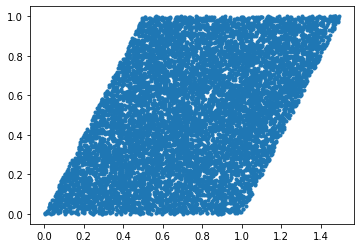

In [117]:
def Cau6A(N):
    xy = []
    T = 0
    i = 0
    while i < N:
        T = T + 1
        Xn = np.random.uniform(0, 1.5)
        Yn = np.random.uniform(0, 1)

        if 2*Xn-Yn>0 and 2*Xn-Yn-2<=0:
            xy.append((Xn, Yn))
            i = i + 1
            
    return (np.array(xy), T)

xy, T = Cau6A(num_simulations)

print("Acceptance rate:", round(np.pi/4, 4), round(num_simulations/T, 4))

plt.plot(xy[:, 0], xy[:, 1], ".")
plt.gca().set_aspect('equal')
plt.show()

### b) 2 nửa hình tròn

Acceptance rate: 0.7854 0.4905


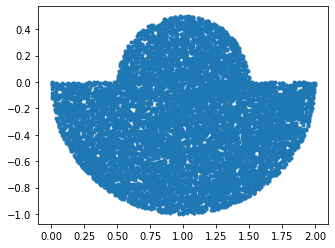

In [118]:
def Cau6B(N):
    xy = []
    T = 0
    i = 0
    while i < N:
        T = T + 1
        Xn, Yn = np.random.uniform(-1, 1, size=2)
        if Yn < 0:
            if (Xn)**2 + (Yn)**2 <= 1:
                i = i + 1
                xy.append((Xn+1, Yn))

        elif np.sqrt((Xn)**2 + (Yn)**2) <= 0.5:
            i = i + 1
            xy.append((Xn+1, Yn))
            
    return (np.array(xy), T)

xy, T = Cau6B(num_simulations)

print("Acceptance rate:", round(np.pi/4, 4), round(num_simulations/T, 4))

plt.plot(xy[:, 0], xy[:, 1], ".")
plt.gca().set_aspect('equal')
plt.show()